# Correlation between Air Conditioner usage and Global temperature

## Import Packages

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [9]:
from scipy import stats
from scipy.optimize import curve_fit

## Import data

In [10]:
df_temp = pd.read_csv('monthly_csv (1).csv')
df_usage = pd.read_csv('global-air-conditioner-stock-1990-2050 (1).csv')

## Print dataframe

In [11]:
pd.set_option ('display.max_rows', 15)
df_usage

,Unnamed: 0,United States,China,Japan and Korea,European Union,India,Indonesia,Mexico,Brazil,Middle East,Rest of world
0,1990,227.02,78.55,106.53,43.77,2.47,1.86,4.60,7.24,12.10,91.55
1,1991,224.22,80.99,114.06,44.33,2.76,1.97,5.19,7.73,13.38,94.24
2,1992,230.77,86.98,118.35,45.92,3.14,2.08,5.47,7.83,14.49,96.36
3,1993,237.33,90.20,122.80,46.84,3.59,2.27,5.26,8.46,15.11,99.90
4,1994,244.60,97.76,126.95,47.93,4.09,2.44,5.32,9.40,15.24,102.03
...,...,...,...,...,...,...,...,...,...,...,...
56,2046,525.86,1397.87,263.28,253.63,1007.65,209.00,111.77,144.67,192.54,1028.95
57,2047,529.97,1404.52,264.06,259.15,1045.54,216.28,115.55,150.12,197.15,1069.62
58,2048,534.06,1410.28,264.80,264.60,1080.78,223.23,119.23,155.36,201.63,1110.64
59,2049,538.13,1415.19,265.51,269.98,1113.47,229.86,122.80,160.38,205.97,1151.98


In [12]:
df_temp

,Source,Date,Mean
0,GCAG,12/06/2016,0.7895
1,GISTEMP,12/06/2016,0.8100
2,GCAG,11/06/2016,0.7504
3,GISTEMP,11/06/2016,0.9300
4,GCAG,10/06/2016,0.7292
...,...,...,...
3283,GISTEMP,1880-03-06,-0.1800
3284,GCAG,1880-02-06,-0.1229
3285,GISTEMP,1880-02-06,-0.2100
3286,GCAG,1880-01-06,0.0009


## Data Processing

Usage

In [13]:
print(df_usage.columns)

Index(['Unnamed: 0', 'United States', 'China', 'Japan and Korea',
       'European Union', 'India', 'Indonesia', 'Mexico', 'Brazil',
       'Middle East', 'Rest of world'],
      dtype='object')


In [14]:
# Rename
df_usage = df_usage.rename(columns={'Unnamed: 0':'year',
                                    'United States': 'us',
                                    'China': 'cn',
                                    'Japan and Korea': 'j&k',
                                    'European Union': 'eu',
                                    'India': 'ind',
                                    'Indonesia': 'indo',
                                    'Mexico': 'mex',
                                    'Brazil': 'br',
                                    'Middle East': 'me',
                                    'Rest of world': 'rest'})

Temp

In [15]:
# Delete data from "GCAG" from temp
for index, row in df_temp.iterrows():
    if (row['Source'] == 'GCAG'):
        df_temp.drop(index, inplace = True)
df_temp.reset_index(drop = True, inplace = True)

# drop source collumn
df_temp.drop(columns = ['Source'], inplace = True)

In [16]:
# convert date to appropriate form
year = []
month = []
for index, row in df_temp.iterrows():
    s = row['Date']
    if (s[2] == '/'):
        ls = list(s.split('/'))
        year.append(ls[2])
        month.append(ls[0])
    else:
        ls = list(s.split('-'))
        year.append(ls[0])
        month.append(ls[1])
df_temp['year'] = year
df_temp['month'] = month
df_temp.drop(columns = ['Date'], inplace = True)

columns_titles_order=['year','month','Mean']
df_temp=df_temp.reindex(columns=columns_titles_order)

df_temp

,year,month,Mean
0,2016,12,0.81
1,2016,11,0.93
2,2016,10,0.89
3,2016,09,0.87
4,2016,08,0.98
...,...,...,...
1639,1880,05,-0.14
1640,1880,04,-0.27
1641,1880,03,-0.18
1642,1880,02,-0.21


## Data Transformation

In [17]:
print(df_temp.dtypes)
print(df_usage.dtypes)

year      object
month     object
Mean     float64
dtype: object
year      int64
us      float64
cn      float64
j&k     float64
eu      float64
ind     float64
indo    float64
mex     float64
br      float64
me      float64
rest    float64
dtype: object


In [18]:
df_temp['year'] = df_temp['year'].astype(int)
df_temp['month'] = df_temp['month'].astype(int)

Since the usage data is by years, it is more reasonable to calculate the average temperature by years

In [19]:
dict_temp = {'year': [],
             'mean': []}
for i in range(0, len(df_temp), 12):
    dict_temp['year'].append(df_temp.loc[i, 'year'])
    sum = 0
    for j in range(i, i + 12):
        sum += df_temp.loc[j, 'Mean']
    sum /= 12
    dict_temp['mean'].append(sum)
df_temp = pd.DataFrame(dict_temp, columns=['year', 'mean'])

In [20]:
df_temp.sort_values(by = 'year', ascending = True, inplace = True)
df_temp.reset_index(drop=True, inplace=True)
df_temp

,year,mean
0,1880,-0.204167
1,1881,-0.115833
2,1882,-0.102500
3,1883,-0.210000
4,1884,-0.284167
...,...,...
132,2012,0.635000
133,2013,0.655833
134,2014,0.743333
135,2015,0.865000


Add a "sum" column to usage

In [21]:
sum = []
for index, row in df_usage.iterrows():
    sum.append(row['us'] + row['cn'] + row['j&k'] + row['eu'] + row['ind'] + row['indo'] + row['mex'] + row['br'] + row['me'] + row['rest'])
df_usage['sum'] = sum
df_usage

,year,us,cn,j&k,eu,ind,indo,mex,br,me,rest,sum
0,1990,227.02,78.55,106.53,43.77,2.47,1.86,4.60,7.24,12.10,91.55,575.69
1,1991,224.22,80.99,114.06,44.33,2.76,1.97,5.19,7.73,13.38,94.24,588.87
2,1992,230.77,86.98,118.35,45.92,3.14,2.08,5.47,7.83,14.49,96.36,611.39
3,1993,237.33,90.20,122.80,46.84,3.59,2.27,5.26,8.46,15.11,99.90,631.76
4,1994,244.60,97.76,126.95,47.93,4.09,2.44,5.32,9.40,15.24,102.03,655.76
...,...,...,...,...,...,...,...,...,...,...,...,...
56,2046,525.86,1397.87,263.28,253.63,1007.65,209.00,111.77,144.67,192.54,1028.95,5135.22
57,2047,529.97,1404.52,264.06,259.15,1045.54,216.28,115.55,150.12,197.15,1069.62,5251.96
58,2048,534.06,1410.28,264.80,264.60,1080.78,223.23,119.23,155.36,201.63,1110.64,5364.61
59,2049,538.13,1415.19,265.51,269.98,1113.47,229.86,122.80,160.38,205.97,1151.98,5473.27


# Data summarization

In [22]:
df_temp['mean'].describe()

count    137.000000
mean       0.024380
std        0.327580
min       -0.474167
25%       -0.210000
50%       -0.070000
75%        0.191667
max        0.992500
Name: mean, dtype: float64

In [23]:
df_usage.describe()

,year,us,cn,j&k,eu,ind,indo,mex,br,me,rest,sum
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,2020.000000,395.716393,738.356557,208.086230,135.210656,269.622951,63.434918,40.156230,53.052951,81.497213,420.407869,2405.541967
std,17.752934,94.318158,502.666617,48.436059,71.071246,367.127419,76.019420,38.423201,47.220019,63.343818,325.010817,1581.517652
min,1990.000000,224.220000,78.550000,106.530000,43.770000,2.470000,1.860000,4.600000,7.240000,12.100000,91.550000,575.690000
25%,2005.000000,328.440000,200.240000,169.430000,79.210000,10.730000,4.030000,9.400000,14.860000,24.010000,152.370000,992.720000
50%,2020.000000,399.470000,730.190000,218.070000,115.310000,47.730000,20.630000,20.930000,31.120000,57.010000,291.730000,1930.070000
75%,2035.000000,477.760000,1256.130000,252.260000,193.550000,458.760000,113.460000,67.160000,80.530000,132.180000,624.450000,3656.240000
max,2050.000000,542.180000,1419.270000,266.190000,275.290000,1143.700000,236.190000,126.250000,165.200000,210.180000,1193.610000,5578.060000


# Data visualization: Temperature

Raw data only

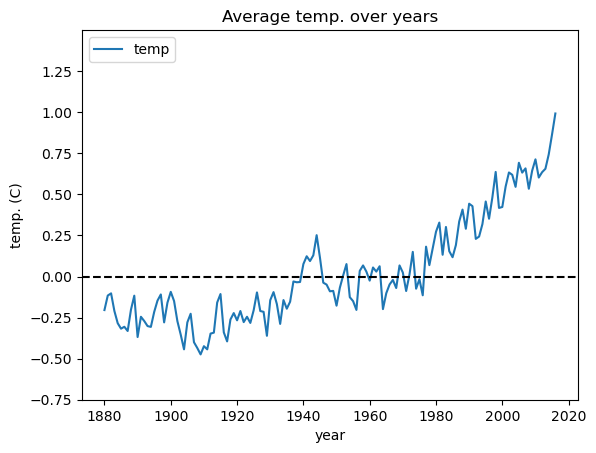

In [24]:
plt.figure()
plt.plot(df_temp['year'],df_temp['mean'],label='temp')
plt.axhline(y = 0, color = 'black', linestyle = '--') 

plt.ylim([-0.75, 1.5])
plt.yticks(np.arange(-0.75,1.5,0.25))

plt.title("Average temp. over years")
plt.legend(loc="upper left")
plt.xlabel('year')
plt.ylabel('temp. (C)')

plt.show()

Apply Moving Average Model (smoothing curve)

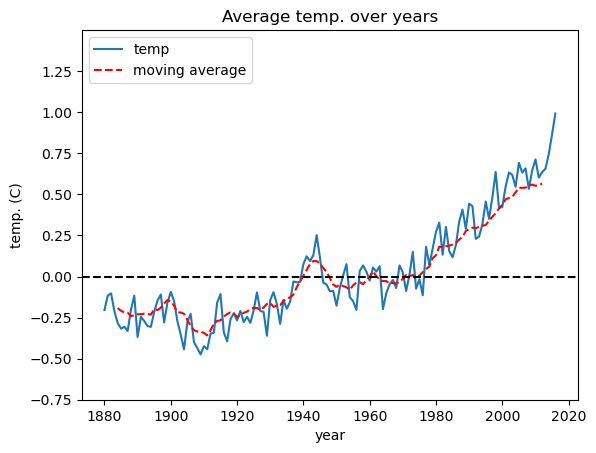

In [25]:
df_temp['mean']
moving_average = []

n = 4 # parameter for the MA
for i in range(len(df_temp)):
    sum = 0
    if (i - n < 0 or i + n - 1 >= len(df_temp)):
        moving_average.append(-0.75)
        continue
    for j in range(i - n, i + n - 1):
        sum += df_temp.loc[j, 'mean']
    moving_average.append(sum / (2*n))

df_temp['moving_average'] = moving_average

plt.figure()
plt.plot(df_temp['year'],df_temp['mean'],label='temp')
plt.plot(df_temp['year'][n:len(df_temp)-n],df_temp['moving_average'][n:len(df_temp)-n],"r--", label='moving average')
plt.axhline(y = 0, color = 'black', linestyle = '--') 

plt.ylim([-0.75, 1.5])
plt.yticks(np.arange(-0.75,1.5,0.25))

plt.title("Average temp. over years")
plt.legend(loc="upper left")
plt.xlabel('year')
plt.ylabel('temp. (C)')

plt.show()

Curve fitting

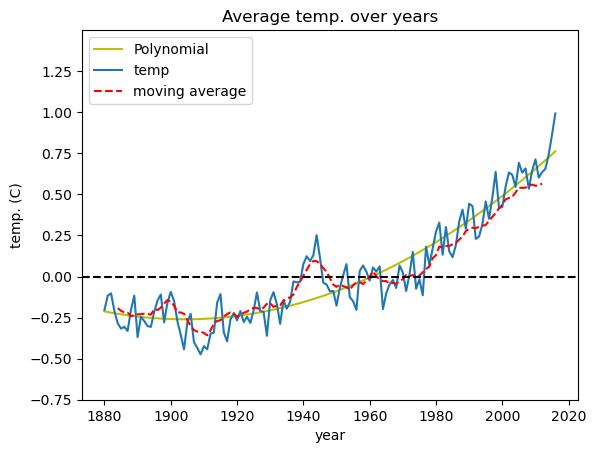

In [26]:
def polynomial_function(x, a, b, c):
    return a * x**2 + b * x + c 

y = df_temp['mean']
x = df_temp['year']

(popt,pcov) = curve_fit(polynomial_function, x, y)
(a,b,c) = popt

plt.figure()

x_line = df_temp['year']
y_line = polynomial_function(x_line,a,b,c)
plt.plot(x_line,y_line,'y-',label='Polynomial')

plt.plot(df_temp['year'],df_temp['mean'],label='temp')
plt.plot(df_temp['year'][n:len(df_temp)-n],df_temp['moving_average'][n:len(df_temp)-n],"r--", label='moving average')
plt.axhline(y = 0, color = 'black', linestyle = '--') 

plt.ylim([-0.75, 1.5])
plt.yticks(np.arange(-0.75,1.5,0.25))

plt.title("Average temp. over years")
plt.legend(loc="upper left")
plt.xlabel('year')
plt.ylabel('temp. (C)')

plt.show()

In [27]:
print(f"Curve: {round(a, 4)}x^2 + {round(b, 4)}x + {round(c, 4)}")

Curve: 0.0001x^2 + -0.3118x + 296.5955


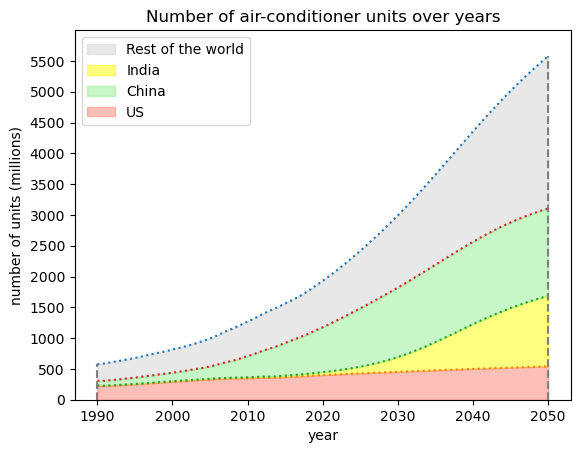

In [28]:

plt.figure()
plt.plot(df_usage['year'],df_usage['sum'],label='sum', linestyle = 'dotted')
plt.plot(df_usage['year'],df_usage['us'],label='us', linestyle = 'dotted')
plt.plot(df_usage['year'],df_usage['ind'] + df_usage['us'],label='india + us', linestyle = 'dotted')
plt.plot(df_usage['year'],df_usage['cn'] + df_usage['ind'] + df_usage['us'],label='china + india + us', linestyle = 'dotted')

plt.fill_between(df_usage['year'], df_usage['sum'], df_usage['cn'] + df_usage['ind'] + df_usage['us'], color='lightgrey', alpha=0.5, label='fill1')

plt.fill_between(df_usage['year'], df_usage['us'], df_usage['ind'] + df_usage['us'], color='yellow', alpha=0.5, label='fill2')

plt.fill_between(df_usage['year'], df_usage['ind'] + df_usage['us'], df_usage['cn'] + df_usage['ind'] + df_usage['us'], color='lightgreen', alpha=0.5, label='fill3')

plt.fill_between(df_usage['year'], 0, df_usage['us'], color='salmon', alpha=0.5, label='fill4')

plt.vlines(2050, 0, df_usage['sum'].max(), color = 'grey', linestyle = '--') 
plt.vlines(1990, 0, df_usage['sum'].min(), color = 'grey', linestyle = '--') 

plt.ylim([0, 6000])
plt.yticks(np.arange(0,6000,500))

plt.title('Number of air-conditioner units over years')

# Create legend for the fill areas
fill1_patch = mpatches.Patch(color='lightgrey', alpha=0.5, label='Rest of the world')
fill2_patch = mpatches.Patch(color='yellow', alpha=0.5, label='India')
fill3_patch = mpatches.Patch(color='lightgreen', alpha=0.5, label='China')
fill4_patch = mpatches.Patch(color='salmon', alpha=0.5, label='US')

# Add the fill areas to the legend
plt.legend(handles=[fill1_patch, fill2_patch, fill3_patch, fill4_patch], loc="upper left")

plt.xlabel('year')
plt.ylabel('number of units (millions)')

plt.show()


# Data Visualize: Temp and No. of units

Preparation: Create a table with both temp and no.

In [29]:
start = 1990
stop = 2016
dict_comb = {
    'year': [],
    'temp': [],
    'unit': []
}

for index, row in df_temp.iterrows():
    y = row['year']
    if ((start <= y) & (y <= stop)):
        dict_comb['year'].append(row['year'])
        dict_comb['temp'].append(row['mean'])
        
for index, row in df_usage.iterrows():
    y = row['year']
    if ((y <= stop) & (y >= start)):
        dict_comb['unit'].append(row['sum'])

df_comb = pd.DataFrame(dict_comb, columns=['year', 'temp', 'unit'])

df_comb


,year,temp,unit
0,1990.0,0.443333,575.69
1,1991.0,0.428333,588.87
2,1992.0,0.229167,611.39
3,1993.0,0.243333,631.76
4,1994.0,0.319167,655.76
...,...,...,...
22,2012.0,0.635000,1391.97
23,2013.0,0.655833,1448.66
24,2014.0,0.743333,1502.32
25,2015.0,0.865000,1563.45


Raw data

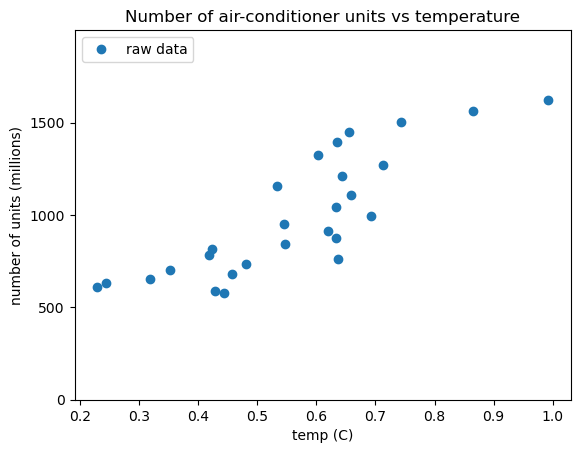

In [30]:
plt.figure()
plt.plot(df_comb['temp'],df_comb['unit'],'o',label='raw data')

plt.ylim([0, 2000])
plt.yticks(np.arange(0,2000,500))

plt.title('Number of air-conditioner units vs temperature')
plt.legend(loc="upper left")
plt.xlabel('temp (C)')
plt.ylabel('number of units (millions)')

plt.show()

Correlation coefficient

In [31]:
np.corrcoef(df_comb['temp'], df_comb['unit'])

array([[1.        , 0.84235604],
       [0.84235604, 1.        ]])

&#8594; strong positive correlation

Linear regression

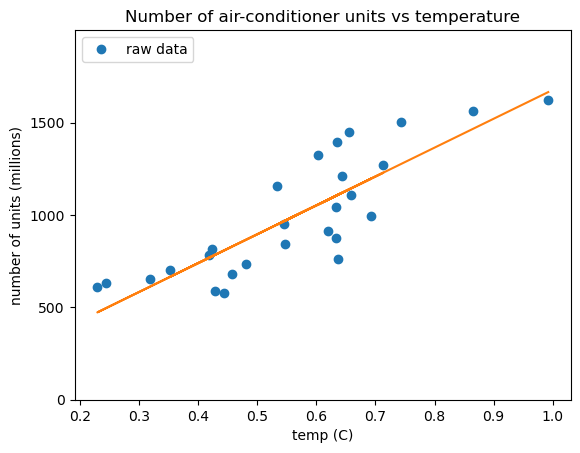

In [32]:
x = df_comb['temp']
y = df_comb['unit']
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.figure()
plt.plot(df_comb['temp'],df_comb['unit'],'o',label='raw data')
plt.plot(x, mymodel)

plt.ylim([0, 2000])
plt.yticks(np.arange(0,2000,500))

plt.title('Number of air-conditioner units vs temperature')
plt.legend(loc="upper left")
plt.xlabel('temp (C)')
plt.ylabel('number of units (millions)')

plt.show()

##### Citation:

Datopian. n.d. “Global-Temp - DataHub - Frictionless Data.” https://datahub.io/core/global-temp/r/1.html. 

“Global Air Conditioner Stock, 1990-2050 – Charts – Data & Statistics - IEA.” n.d. IEA. https://www.iea.org/data-and-statistics/charts/global-air-conditioner-stock-1990-2050. 

Tsai, Wen‐Tien. 2005. “An Overview of Environmental Hazards and Exposure Risk of Hydrofluorocarbons (HFCs).” Chemosphere 61 (11): 1539–47. https://doi.org/10.1016/j.chemosphere.2005.03.084.